In [9]:

from Matrix import Matrix
from Matrix_data import Matrix_data
from Matrix_General import Matrix_General
from Segments_Locations import Segments_Locations
from Mode_Global import Mode_Global
from Mode_Tchou_Tchou import Mode_Tchou_Tchou

matrix_data = Matrix_data()
matrix = Matrix(matrix_data)
mode = Mode_Tchou_Tchou(matrix)
matrix_general = Matrix_General(mode)

ModuleNotFoundError: No module named 'Mode_Globaux'

In [4]:
import numpy as np

class Segments_Locations:
    def __init__(self):
        self.len_h00 = 205
        self.len_h10 = 87
        self.len_h11 = 86
        self.len_h20 = 91
        self.len_h30 = 47
        self.len_h31 = 48
        self.len_h32 = 48

        self.len_v1 = 173
        self.len_v2 = 173
        self.len_v3 = 173
        self.len_v4 = 173

        self.coord_y_h31 = self.len_v1 * 2 // 5 + 16
        self.coord_y_h32 = self.len_v1 * 9 // 10 + 16

        self.offset_h30_v4 = 16

        self.segment_h00 = [[i, self.offset_h30_v4] for i in range(self.len_h00)]
        self.segment_h10 = [[i + self.len_h00, self.len_v1 // 3 + self.offset_h30_v4] for i in range(self.len_h10)]
        self.segment_h11 = [[i + self.len_h00, self.len_v1 + self.offset_h30_v4] for i in range(self.len_h11)]
        self.segment_h20 = [[i + self.len_h10 + self.len_h00, self.offset_h30_v4] for i in range(self.len_h20)]
        self.segment_h30 = [[i + self.len_h00 + self.len_h10 + self.len_h20, 0] for i in range(self.len_h30)]
        self.segment_h31 = [[i + self.len_h00 + self.len_h10 + self.len_h20, self.coord_y_h31] for i in range(self.len_h31)]
        self.segment_h32 = [[i + self.len_h00 + self.len_h10 + self.len_h20, self.coord_y_h32] for i in range(self.len_h32)]

        self.segment_v1 = [[self.len_h00, i + self.offset_h30_v4] for i in range(self.len_v1)]
        self.segment_v2 = [[self.len_h00 + self.len_h10, i + self.offset_h30_v4 + self.len_v1 // 3] for i in range(self.len_v2)]
        self.segment_v3 = [[self.len_h00 + self.len_h10 + self.len_h20, i + self.offset_h30_v4] for i in range(self.len_v3)]
        self.segment_v4 = [[self.len_h00 + self.len_h10 + self.len_h20 + self.len_h31, i + self.offset_h30_v4 * 2] for i in range(self.len_v4)]

        self.segment_coords = [
            self.segment_h00,
            self.segment_h10,
            self.segment_h11,
            self.segment_h20,
            self.segment_h30,
            self.segment_h31,
            self.segment_h32,
            self.segment_v1,
            self.segment_v2,
            self.segment_v3,
            self.segment_v4
        ]

    def generate_matrix(self):
        # Flatten the segment coordinates and find the bounding box
        all_coords = [coord for segment in self.segment_coords for coord in segment]
        max_x = max(coord[0] for coord in all_coords)
        max_y = max(coord[1] for coord in all_coords)

        # Create a zero matrix with the appropriate size
        matrix = np.zeros((max_y + 1, max_x + 1), dtype=int)

        # Populate the matrix with 1s for each segment coordinate
        for x, y in all_coords:
            matrix[y][x] = 1

        return matrix


# Instantiate the class and generate the matrix
segments = Segments_Locations()
matrix = segments.generate_matrix()

# Optionally, print the matrix
print(matrix)

[[0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


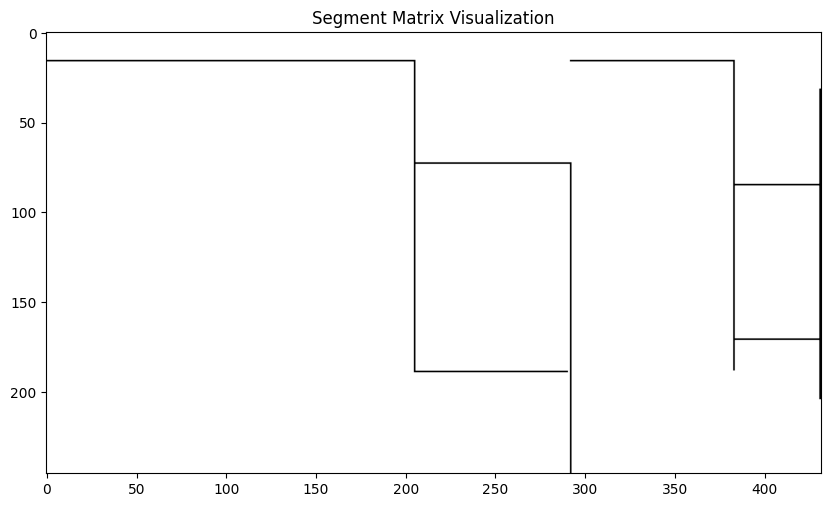

In [5]:
import matplotlib.pyplot as plt

# Visualize the matrix
plt.figure(figsize=(10, 10))
plt.imshow(matrix, cmap='Greys', origin='upper')
plt.title("Segment Matrix Visualization")
plt.show()
